In [17]:
import sys

sys.path.append("../modules")

top_dir = "/Users/pictomo/Repositories/SequentialCTA_experiment"

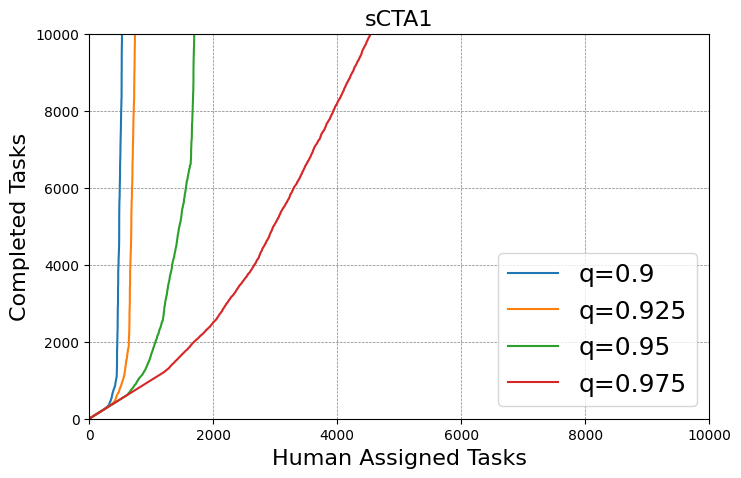

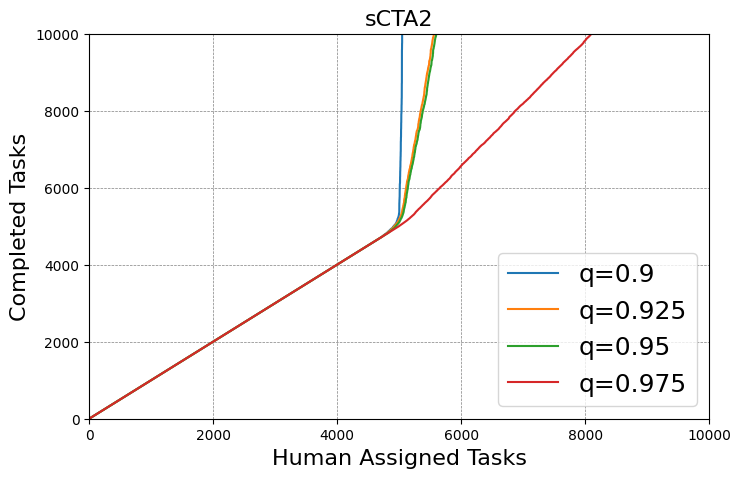

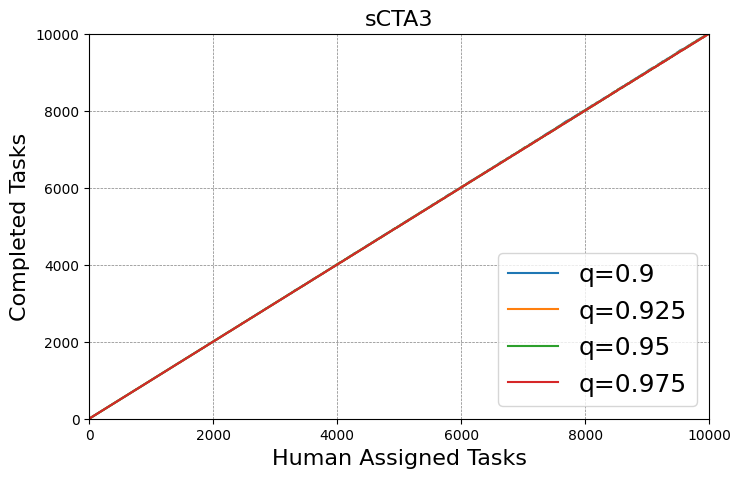

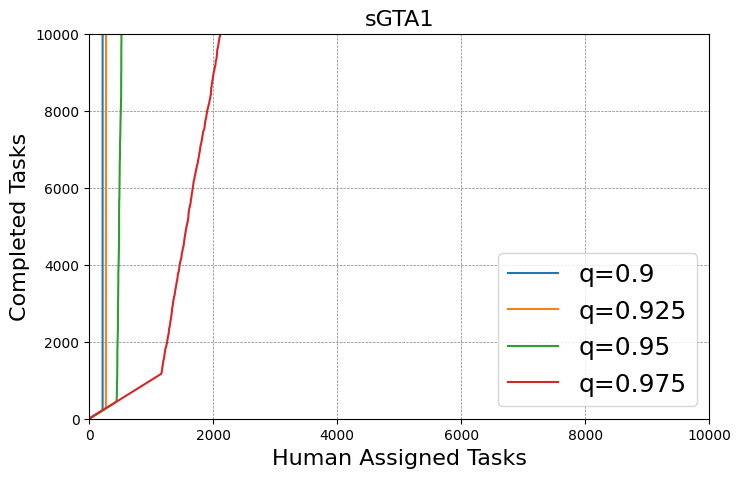

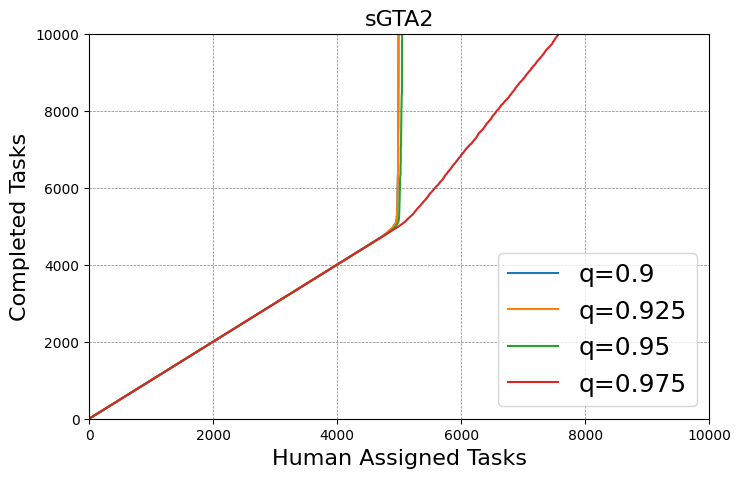

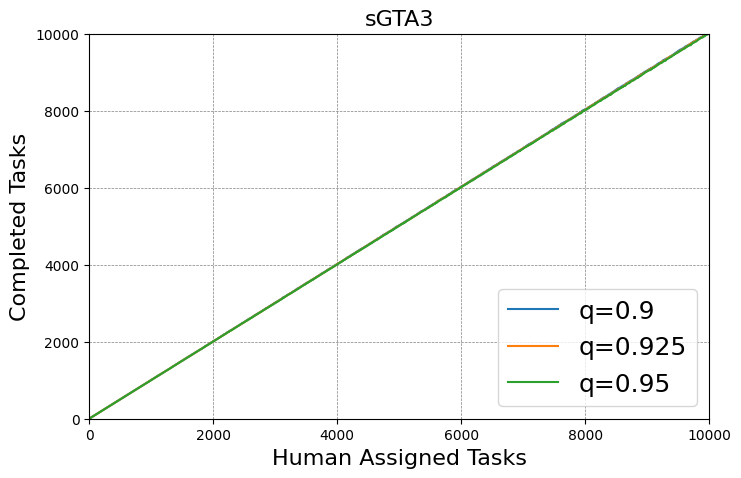

In [18]:
import os
import json
import glob
import matplotlib.pyplot as plt

for method in ["cta1", "cta2", "cta3", "gta1", "gta2", "gta3"]:
    task_scale = 10000
    method_label = {
        "cta1": "sCTA1",
        "cta2": "sCTA2",
        "cta3": "sCTA3",
        "gta1": "sGTA1",
        "gta2": "sGTA2",
        "gta3": "sGTA3",
    }

    data = {}

    for quality_requirement in [0.9, 0.925, 0.95, 0.975]:
        for file in glob.glob(
            # os.path.join(top_dir, f"results/expr2/{method}_*.txt")
            os.path.join(
                top_dir,
                f"results/expr1/{method}_{1}_{quality_requirement}{f"_500" if method in ["cta2", "gta2"] else ""}_*.json",
            )
        ):
            with open(
                file,
                "r",
                encoding="utf-8",
            ) as file:
                json_data = json.load(file)  # JSONをPythonのdictに変換
            data[quality_requirement] = (
                json_data["question_count"],
                json_data["human_count"],
            )

    # # 100タスク分のデータ（リテラル記述）
    # data = {
    #     0.8: (
    #         [0, 1, 2, 3, 5, 7, 10, 13, 16, 20, 23, 26, 30, 33, 37, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100],
    #         [0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 16, 18, 20, 23, 26, 28, 30, 33, 36, 39, 42, 44, 47, 50, 52, 55, 58, 60, 63]
    #     ),
    #     0.85: (
    #         [0, 2, 4, 6, 9, 12, 15, 18, 22, 25, 28, 31, 35, 38, 41, 45, 48, 52, 55, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98],
    #         [0, 1, 3, 4, 6, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23, 25, 28, 30, 32, 34, 37, 40, 42, 44, 46, 49, 52, 54, 56, 59]
    #     ),
    #     0.9: (
    #         [0, 3, 6, 9, 12, 15, 19, 22, 25, 28, 32, 35, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98],
    #         [0, 0, 1, 2, 3, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 24, 27, 30, 32, 34, 37, 40, 42, 44, 46, 49, 52, 55]
    #     ),
    #     0.95: (
    #         [0, 4, 8, 12, 16, 20, 25, 30, 35, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100],
    #         [0, 0, 1, 1, 2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20, 23, 26, 28, 30]
    #     )
    # }

    # グラフの描画
    plt.figure(figsize=(8, 5))

    linewidth = 1.5  # 線の太さ

    for q, (completed_tasks, human_labels) in data.items():
        plt.plot(human_labels, completed_tasks, label=f"q={q}", linewidth=linewidth)

    # 軸ラベル
    plt.xlabel("Human Assigned Tasks", fontsize=16)
    plt.ylabel("Completed Tasks", fontsize=16)
    # plt.title(f"{method_label[method]} - {task_scale} Task Scale")
    plt.title(method_label[method], fontsize=16)

    # 軸範囲の固定
    plt.xlim(0, task_scale)
    plt.ylim(0, task_scale)

    # 凡例を右下に配置（フォントサイズは2倍）
    plt.legend(loc="lower right", fontsize=18)

    # 背景を黒にする設定（今はコメントアウト）
    # plt.style.use("dark_background")

    # グリッドの表示
    plt.grid(color="gray", linestyle="dashed", linewidth=0.5)

    # 表示
    plt.show()

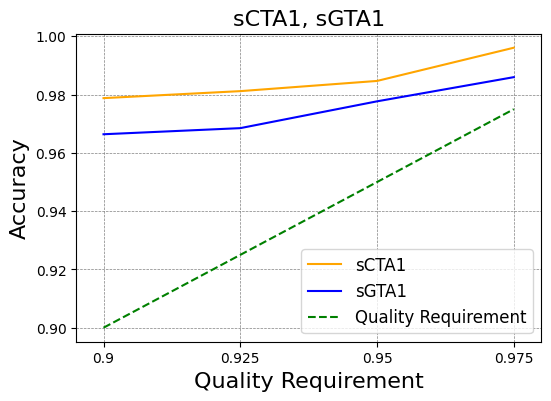

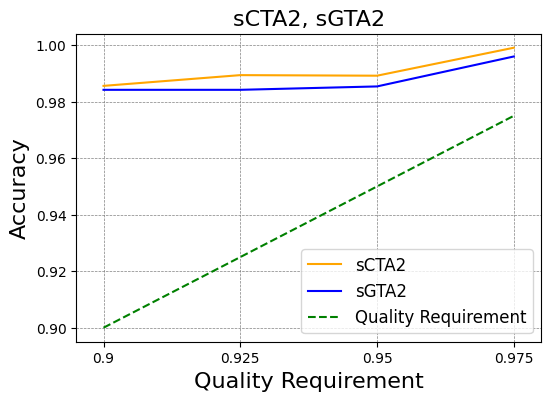

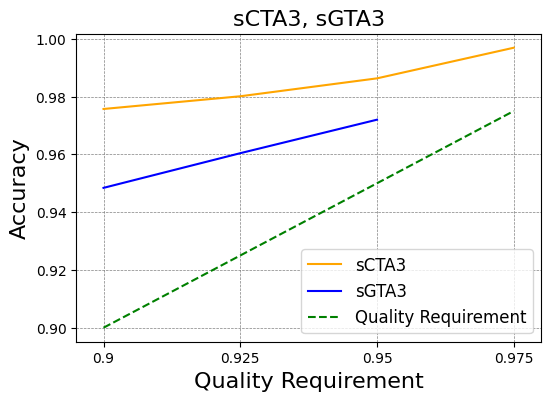

In [19]:
import matplotlib.pyplot as plt
import numpy as np

for method_num in [1, 2, 3]:
    task_scale = 10000
    method_label = {
        "cta1": "sCTA1",
        "cta2": "sCTA2",
        "cta3": "sCTA3",
        "gta1": "sGTA1",
        "gta2": "sGTA2",
        "gta3": "sGTA3",
    }

    data = {"cta": [], "gta": []}
    data_points = [0.9, 0.925, 0.95, 0.975]

    for method_pre in ["cta", "gta"]:
        for quality_requirement in data_points:
            json_data=None
            for file in glob.glob(
                # os.path.join(top_dir, f"results/expr2/{method}_*.txt")
                os.path.join(
                    top_dir,
                    f"results/expr1/{method_pre}{method_num}_{1}_{quality_requirement}{f"_{500}" if method_num == 2 else ""}_*.json",
                )
            ):
                with open(
                    file,
                    "r",
                    encoding="utf-8",
                ) as file:
                    json_data = json.load(file)  # JSONをPythonのdictに変換
            if json_data is not None:
                data[method_pre].append(json_data["collect_count"][-1] / task_scale)
            else:
                data[method_pre].append(None)

    # サンプルデータ（Quality Requirement）
    quality_requirements = np.array(data_points)

    # Quality Requirement（y = x に沿うように）
    quality_requirement_values = quality_requirements

    # sCTA1 と sGTA1 の Accuracy を外部リストから取得
    scta_accuracies = np.array(data["cta"])  # 例: sCTA1 の Accuracy
    sgta_accuracies = np.array(data["gta"])  # 例: sGTA1 の Accuracy
    # scta_accuracies = [0.82, 0.86, 0.94, 0.96]  # 例: sCTA1 の Accuracy
    # sgta_accuracies = [0.81, 0.88, 0.96, 0.97]  # 例: sGTA1 の Accuracy

    # グラフの描画
    plt.figure(figsize=(6, 4))

    # sCTA1（オレンジの実線）
    plt.plot(
        quality_requirements,
        scta_accuracies,
        linestyle="-",
        linewidth=1.5,
        color="orange",
        label=f"sCTA{method_num}",
    )

    # sGTA1（青の実線）
    plt.plot(
        quality_requirements,
        sgta_accuracies,
        linestyle="-",
        linewidth=1.5,
        color="blue",
        label=f"sGTA{method_num}",
    )

    # Quality Requirement（緑の点線、一番下に配置、y=xに沿う）
    plt.plot(
        quality_requirements,
        quality_requirement_values,
        linestyle="dashed",
        linewidth=1.5,
        color="green",
        label="Quality Requirement",
    )

    # 軸ラベル
    plt.xlabel("Quality Requirement", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.title(f"sCTA{method_num}, sGTA{method_num}", fontsize=16)

    # 軸範囲の設定（X軸を 0.895 ~ 0.98 に拡張）
    plt.xlim(data_points[0]-0.005, data_points[-1]+0.005)

    # 横軸の目盛をデータ点のみに設定（余計な0を削除）
    plt.xticks(quality_requirements, labels=[str(q) for q in quality_requirements])

    # データポイントの位置に縦のグリッドを追加
    plt.grid(axis="x", color="gray", linestyle="dashed", linewidth=0.5)

    # 縦のグリッドを削除し、横のグリッドのみ表示
    plt.grid(axis="y", color="gray", linestyle="dashed", linewidth=0.5)

    # 凡例を右下に配置（sCTA1 → sGTA1 → Quality Requirement の順に変更）
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [handles[0], handles[1], handles[2]]  # sCTA1, sGTA1, Quality Requirement
    labels = [labels[0], labels[1], labels[2]]
    plt.legend(handles, labels, loc="lower right", fontsize=12)

    # 背景を黒にする設定（今はコメントアウト）
    # plt.style.use("dark_background")

    # 表示
    plt.show()

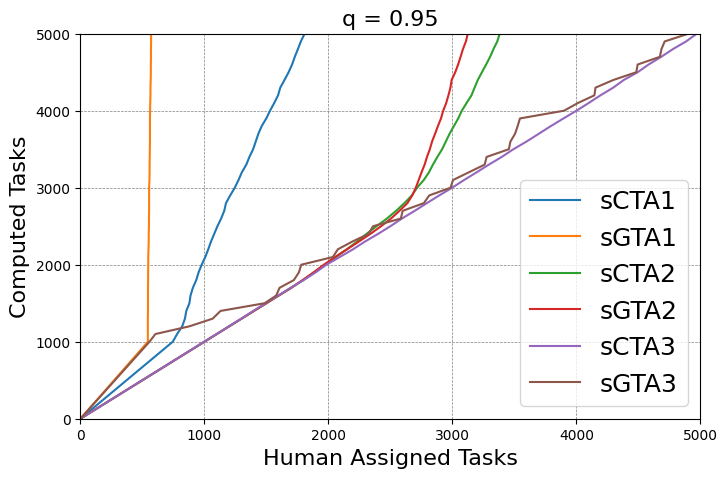

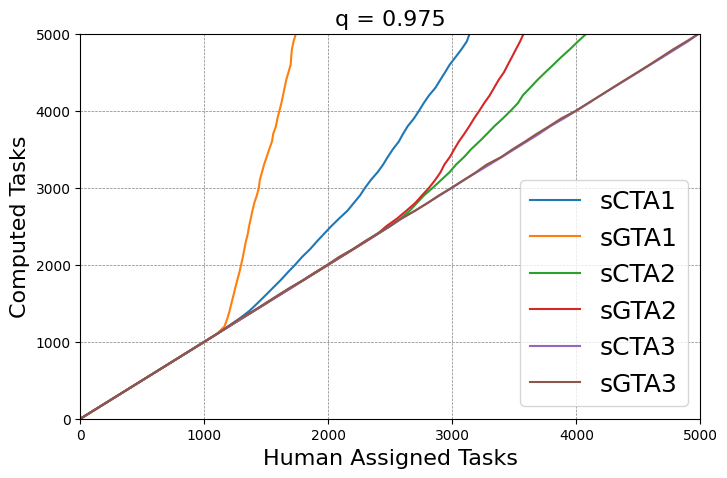

In [26]:
import os
import json
import glob
import matplotlib.pyplot as plt

for quality_requirement in [0.95, 0.975]:
    task_scale = 5000
    method_label = {
        "cta1": "sCTA1",
        "cta2": "sCTA2",
        "cta3": "sCTA3",
        "gta1": "sGTA1",
        "gta2": "sGTA2",
        "gta3": "sGTA3",
    }

    data = {}

    for method in ["cta1", "gta1", "cta2", "gta2", "cta3", "gta3"]:
        for file in glob.glob(
            os.path.join(
                top_dir, f"results/expr2/{method}_{quality_requirement}_*.json"
            )
            # os.path.join(top_dir, f"results/expr1/{method}_{1}_{quality_requirement}_*.json")
        ):
            with open(
                file,
                "r",
                encoding="utf-8",
            ) as file:
                json_data = json.load(file)  # JSONをPythonのdictに変換
            data[method_label[method]] = (
                json_data["question_count"],
                json_data["human_count"],
            )

    # # 100タスク分のデータ（リテラル記述）
    # data = {
    #     0.8: (
    #         [0, 1, 2, 3, 5, 7, 10, 13, 16, 20, 23, 26, 30, 33, 37, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100],
    #         [0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 16, 18, 20, 23, 26, 28, 30, 33, 36, 39, 42, 44, 47, 50, 52, 55, 58, 60, 63]
    #     ),
    #     0.85: (
    #         [0, 2, 4, 6, 9, 12, 15, 18, 22, 25, 28, 31, 35, 38, 41, 45, 48, 52, 55, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98],
    #         [0, 1, 3, 4, 6, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23, 25, 28, 30, 32, 34, 37, 40, 42, 44, 46, 49, 52, 54, 56, 59]
    #     ),
    #     0.9: (
    #         [0, 3, 6, 9, 12, 15, 19, 22, 25, 28, 32, 35, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98],
    #         [0, 0, 1, 2, 3, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 24, 27, 30, 32, 34, 37, 40, 42, 44, 46, 49, 52, 55]
    #     ),
    #     0.95: (
    #         [0, 4, 8, 12, 16, 20, 25, 30, 35, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100],
    #         [0, 0, 1, 1, 2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20, 23, 26, 28, 30]
    #     )
    # }

    # グラフの描画
    plt.figure(figsize=(8, 5))

    linewidth = 1.5  # 線の太さ

    for q, (completed_tasks, human_labels) in data.items():
        plt.plot(human_labels, completed_tasks, label=f"{q}", linewidth=linewidth)

    # 軸ラベル
    plt.xlabel("Human Assigned Tasks", fontsize=16)
    plt.ylabel("Computed Tasks", fontsize=16)
    # plt.title(f"{method_label[method]} - {task_scale} Task Scale")
    plt.title(f"q = {quality_requirement}", fontsize=16)

    # 軸範囲の固定
    plt.xlim(0, task_scale)
    plt.ylim(0, task_scale)

    # 凡例を右下に配置（フォントサイズは2倍）
    plt.legend(loc="lower right", fontsize=18)

    # 背景を黒にする設定（今はコメントアウト）
    # plt.style.use("dark_background")

    # グリッドの表示
    plt.grid(color="gray", linestyle="dashed", linewidth=0.5)

    # 表示
    plt.show()